<a href="https://colab.research.google.com/github/jorobledo/Trayecto2_visualizacion/blob/main/Notebook1_Trayecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<h1> Herramientas para la visualización de datos </h1>

<h2> Trayecto 2 - Academia Data Driven: Módulo 3 - Unidad 4 <h2>

Docente: <a href= "https://jorobledo.github.io/"> José Ignacio Robledo </a>
</center>

### *Fechas*
-  Clase 1 (29/09)

-  Clase 2 (06/10)

-  Clase 3 (13/10)

-  Clase 4 (20/10) 

-  Tutoría (27/10)

### Temario 

-  Introducción y conceptos fundamentales

-  Visualización de datos numéricos: datos, mapas, gráficos, uso de glyphs,
gráficos apilados.

-  Visualización de datos no numéricos: gráficos, redes, gráficos de
componente-principal, árboles, escalado multidimensional.

- Reportes, dashboards y otros recursos

-  Comunicación de datos.

-  Ejercicio de aplicación

## Introducción

### Criterio a la hora de armar una figura

<center>
<img src=https://clauswilke.com/dataviz/introduction_files/figure-html/ugly-bad-wrong-examples-1.png width=600>
</center>

Extraída de [1]. Ejemplo de figuras estéticamente feas, malas, e incorrectas. a.) Imagen razonable. b.) Una versión que no resulta agradable a la vista de (a). Aunque no está mal, los colores son muy brillantes y no son útiles. El fondo es demasiado fuerte y el texto está escrito con distintas fuentes. c.) Una versión mala de (a). Cada barra tiene su propio eje con distinta escala. Esto puede hacer que la figura engañe. d.) Una versión incorrecta de (a). No tiene eje explícito de las $y$. 


### Variaciones para mejorar la visualización

<center>
<img src=https://clauswilke.com/dataviz/aesthetic_mapping_files/figure-html/common-aesthetics-1.png width=600>
</center>
Algunas de las distintas variables con las que se puede jugar al diseñar un gráfico (en inglés llamados **aesthetics** ). 

- [Mapas de colores en Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

- [Mapa de formas en Matplotlib](https://matplotlib.org/stable/api/markers_api.html)


### Ejes de coordenadas

- Ejes cartesianos

<center>
<img src=https://clauswilke.com/dataviz/coordinate_systems_axes_files/figure-html/cartesian-coord-1.png width=600 hight=400>
</center>

- Ejes transformados

<center>
<img src=https://clauswilke.com/dataviz/coordinate_systems_axes_files/figure-html/linear-log-scales-1.png width=600 hight=400>
</center>

<center>
<img src=https://clauswilke.com/dataviz/coordinate_systems_axes_files/figure-html/sqrt-scales-1.png width=600 hight=400>
</center>

- Ejes polares


<center>
<img src=https://clauswilke.com/dataviz/coordinate_systems_axes_files/figure-html/temperature-normals-polar-1.png width=600 hight=400>
</center>



### Tipo de dato acota tipo de gráfico posible

Los datos, ¿Numéricos o categóricos?¿Son continuos o discretos? ¿binarios o multiclase?

<a href="https://raw.githubusercontent.com/Financial-Times/chart-doctor/main/visual-vocabulary/poster.png"> <img src=https://raw.githubusercontent.com/Financial-Times/chart-doctor/main/visual-vocabulary/poster.png> </a>



También dejo este [hermoso repositorio](https://www.python-graph-gallery.com/) de gráficos con sus respectivos códigos en Python. Algunos están obsoletos por cambio de versiones en los paquetes, pero con pequeñas modificaciones se pueden hacer andar nuevamente. Estos códigos están basados en matplotlib y seaborn principalmente, y algunos en plotly.

### Paquetes de Python que utilizaremos para graficar

- [matplotlib](https://matplotlib.org/): Copia el estilo de gráficos y la lógica de implementación de Matlab. Es la librería estándar de graficación en Python y está ampliamente documentada.

- [seaborn](https://seaborn.pydata.org/): Paquete basado en matplotlib que sirve para combinar con Pandas. Está pensado para graficar datos estadísticos. 

- [plotly](https://plotly.com/): Permite gráficos interactivos de manera sencilla y generación de dashboards. 

- [bokeh](http://bokeh.org/): Permite gráficos interactivos de manera sencilla y generación de dashboards.

#### Alguno paquetes auxiliares que utilizaremos para manipulación de datos

- [numpy](https://numpy.org/) : Viene de '**Num**erical **Py**thon'. Posibilita gran cantidad de operaciones numéricas en Python. Especialmente útil para trabajar con objetos `numpy.array`, donde las operaciones están definidas con el fin de ser intuitivas para el usuario.  

- [pandas](https://pandas.pydata.org/) : Viene de '**Pan**el **Da**ta'. Sirve para trabajar conm `pandas.DataFrame` y `pandas.Series`. Habilita gran cantidad de métodos sobre dataframes y series. 

#### Algunos paquetes donde encontraremos algoritmos útiles

- [scikit-learn](https://scikit-learn.org/stable/): Engloba una gran cantidad de algoritmos de aprendizaje automático supervisado y no supervisado, como también metodos de exploración de datos multivariantes. 

- [scipy](https://scipy.org/): Viene de '**Sci**entific **Py**thon' Ofrece módulos para trabajar con métodos estadísticos y módulos de optimización de funciones, entre otras herramientas.

In [ ]:
# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bk
from bokeh.io import output_notebook
output_notebook()
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para algoritmos
import sklearn
import scipy

## Preparación de datos para graficar

Cada paquete ha sido programado para interpretar los datos de entrada de una manera específica. Mientras que hay algunos paquetes como `matplotlib` que recien los datos ya sea en listas, arrays, o dataframes, hay otros como `seaborn` que están pensados para trabajar específicamente con `DataFrames`. Por ende, debemos siempre preparar los datos acorde al paquete que deseemos utilizar.  

Comenzaremos con un caso sencillo en donde armaremos una tabla de datos utilizando `pandas.Series` y `pandas.DataFrame`:

In [ ]:
x = pd.Series(range(1,6), name='x')
print(x)
print(f'Hay {x.shape[0]} datos  en esta serie.')

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
Hay 5 datos  en esta serie.


Generaremos algunos datos sintéticos utilizando el método `np.random.normal`: 

In [ ]:
np.random.seed(0)
datos = pd.Series(np.random.normal(size=(x.shape)), name='Variable ficticia')
print(datos)
print('\n')
print(f'La media de los datos es {datos.mean():.2f} y su desvío estándar es {datos.std():.2f}.')
print(f'El valor máximo es {datos.max()} y el valor mínimo {datos.min()}. \n')

print(datos.describe())

0    1.764052
1    0.400157
2    0.978738
3    2.240893
4    1.867558
Name: Variable ficticia, dtype: float64


La media de los datos es 1.45 y su desvío estándar es 0.75.
El valor máximo es 2.240893199201458 y el valor mínimo 0.4001572083672233. 

count    5.000000
mean     1.450280
std      0.745445
min      0.400157
25%      0.978738
50%      1.764052
75%      1.867558
max      2.240893
Name: Variable ficticia, dtype: float64


Podemos armar el conjunto de datos utilizando `pd.DataFrame`:

In [ ]:
df = pd.DataFrame([x, datos]); df

,0,1,2,3,4
x,1.000000,2.000000,3.000000,4.000000,5.000000
Variable ficticia,1.764052,0.400157,0.978738,2.240893,1.867558


In [ ]:
df = df.T; df

,x,Variable ficticia
0,1.0,1.764052
1,2.0,0.400157
2,3.0,0.978738
3,4.0,2.240893
4,5.0,1.867558


In [ ]:
df.x = df.x.astype(int)

Podemos agregar nuevas columnas al dataframe:

In [ ]:
df['Variable**2'] = df['Variable ficticia']**2; df

,x,Variable ficticia,Variable**2
0,1,1.764052,3.111881
1,2,0.400157,0.160126
2,3,0.978738,0.957928
3,4,2.240893,5.021602
4,5,1.867558,3.487773


##  Matplotlib, Seaborn, Bokeh u otro?
Ya podemos graficar esta variable ficticia, utilizando el método incorporado en `pandas`, que está basado en `matplotlib`

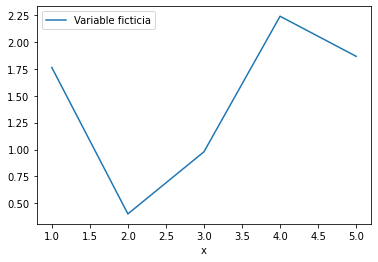

In [ ]:
df.plot(x='x',y='Variable ficticia')
plt.show()

Es exactamente lo mismo que hacer:

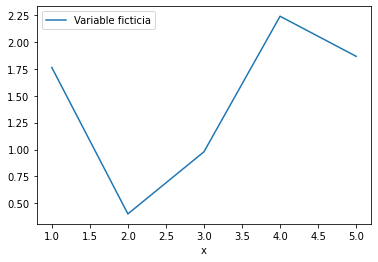

In [ ]:
# Versión matplotlib

# Inicializamos la figura
plt.figure()

# agregamos los trazos que querramos a la figura
plt.plot(df['x'], df['Variable ficticia'],  label='Variable ficticia')

# Modificamos propiedades de visualización de la figura
plt.xlabel('x')
plt.legend()

# Cerramos el gráfico y graficamos
plt.show()

O bien con seaborn:

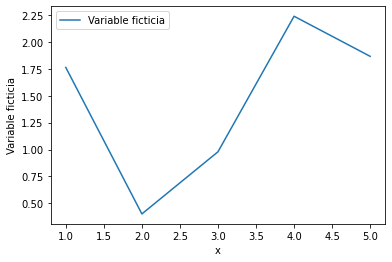

In [ ]:
# Podemos inicializar la figura (no es necesario)
plt.figure()

# Generamos figura con trazo y algunas propiedades por default
sns.lineplot(x='x', y='Variable ficticia', data=df, label='Variable ficticia')

# Podemos estilizar con matplotlib todo lo que querramos ya que el gráfico está
# basado en matplotlib.
plt.legend()
# Cerramos la figura y graficamos
plt.show()

O bien con `Bokeh`:

In [ ]:
# Iniciamos figura
p = bk.figure(width=600)

# Incluímos un trazo
p.line(x='x', y='Variable ficticia', source=df, line_width=4)

# Modificamos propiedades del gráfico
p.xaxis.axis_label = 'x'

# Graficamos
bk.show(p)

### Matplotlib

Vamos a empezar discutiendo algunas de las características más generales del trabajo con esta biblioteca y mostrar algún ejemplo relativamente sencillo. Matplotlib está dividido en tres partes o capas conceptualmente bien delimitadas:

- Una parte es la que hace el trabajo más pesado administrando cada parte del gráfico (líneas, texto, figuras, etc)

- Una segunda parte que permite un uso simple de las funciones anteriores: una interfaz con el usuario. Un ejemplo es el submódulo `pyplot`.

- Una tercera componente que se encarga de presentar la figura en el formato adecuado. Esto es lo que se llama el Backend y se encarga de mostrar la figura en los distintos sistemas de ventanas, o en formatos de archivos correspondientes. Algunos ejemplos de backend son: PS (copias PostScript®), SVG (Scalable Vector Graphics), Agg (salida PNG de muy buena calidad), Cairo (png, pdf, ps, svg), GTK (interactivo, permite integrar matplotlib con aplicaciones Gtk+, que usa GNOME), PDF, WxWidgets (interactivo), Qt (interactivo).

Nosotros vamos a concentrarnos principalmente en aprender a utilizar **pyplot**

Para trabajar en ipython notebooks suele ser conveniente realizar los gráficos dentro de la misma página donde realizamos los cálculos. Si esto no ocurre automáticamente, se puede obtener con la siguiente línea:

#### Plot básico

El siguiente comando define los parámetros de gráficos por default de matplotlib.

In [ ]:
mpl.rc_file_defaults()

Uno de los gráficos más sencillos que podemos hacer es utilizando el método `plot` de `matplotlib`.

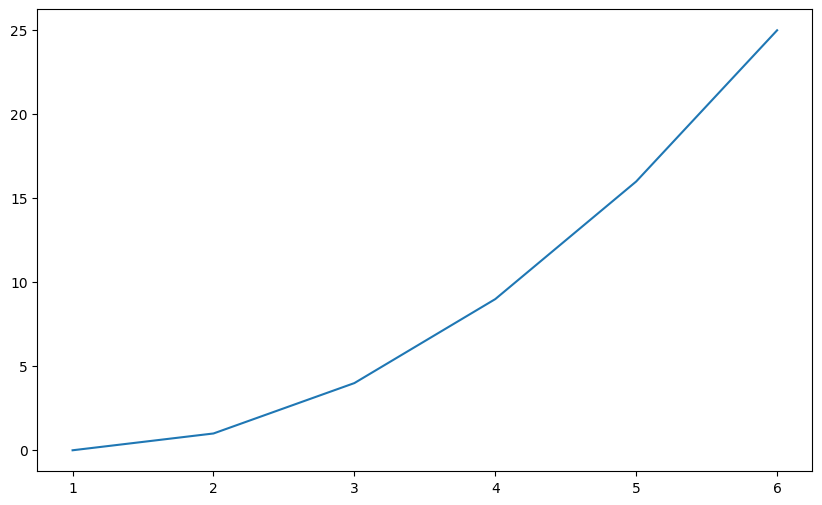

In [ ]:
x, y = [1,2,3,4,5,6], [0,1,4,9,16,25]

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

Podemos modificar las líneas, los símbolos y los colores de cada trazo., por ejemplo:

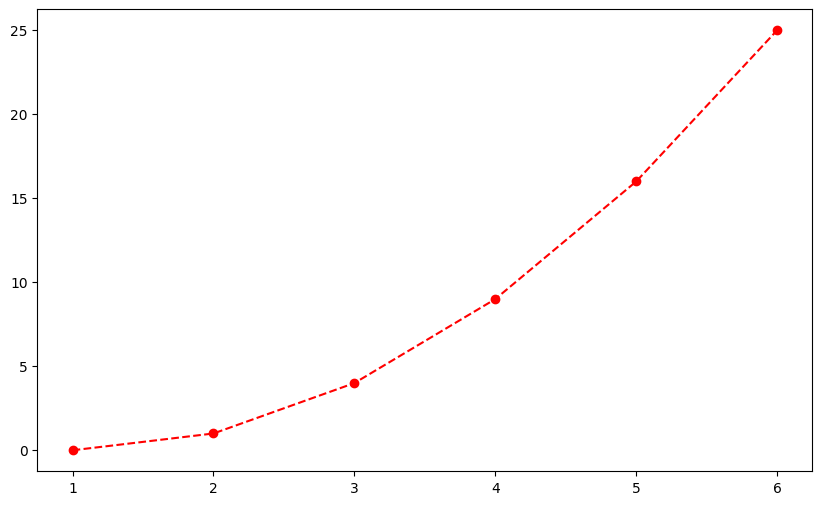

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro--')
plt.show()

Una alternativa sería utilizar los *argumentos palabras claves* o **keyword arguments**, abreviado usualmente como **kwargs, para definir explícitamente el formato y el color 

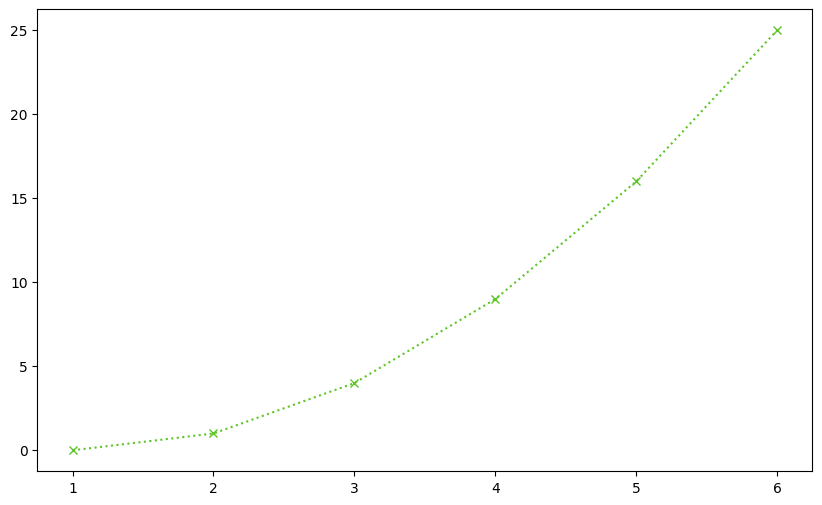

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'x:', color='#5DC527')
plt.show()

 **Markers**
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'<'``          triangle_left marker
    ``'>'``          triangle_right marker
    ``'1'``          tri_down marker
    ``'2'``          tri_up marker
    ``'3'``          tri_left marker
    ``'4'``          tri_right marker
    ``'s'``          square marker
    ``'p'``          pentagon marker
    ``'*'``          star marker
    ``'h'``          hexagon1 marker
    ``'H'``          hexagon2 marker
    ``'+'``          plus marker
    ``'x'``          x marker
    ``'D'``          diamond marker
    ``'d'``          thin_diamond marker
    ``'|'``          vline marker
    ``'_'``          hline marker
    =============    ===============================
    
    **Line Styles**
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================
    
    Example format strings::
    
        'b'    # blue markers with default shape
        'or'   # red circles
        '-g'   # green solid line
        '--'   # dashed line with default color
        '^k:'  # black triangle_up markers connected by a dotted line
    
    **Colors**
    
    The supported color abbreviations are the single letter codes
    
    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================

Para ver la documentación entera de cada clase o método, recuerden utilizar el signo de preguntas:

In [ ]:
plt.plot?

Y si queremos graficar varios gráficos en una sola figura? Traigamos un conjunto de datos más interesante...

[Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

In [ ]:
credit_risk_path = "https://raw.githubusercontent.com/jorobledo/Trayecto2_visualizacion/main/datasets/credit_risk_dataset.csv"
credit_data = pd.read_csv(credit_risk_path); credit_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Lo primero que vamos a hacer es renombrar las variables a nombres que nos sean útiles luego para graficar.

In [ ]:
credit_data.columns = ['Edad', 
                       'Ingresos', 
                       'Situacion de vivienda', 
                       'Tiempo de empleo', 
                       'Tipo de préstamo', 
                       'Grado del préstamo', 
                       'Monto del préstamo', 
                       'Tasa de interés', 
                       'Estado del préstamo', 
                       'Porcentaje del Ingreso', 
                       'Default histórico', 
                       'Long. historial crediticio']

#### Gráfico de dispersión

Ejemplificaremos cómo armar un arreglo de gráficos en una sola figura con gráficos de dispersión de datos numéricos. Para esto, utilizaremos el método `plt.scatter` (ver documentación con `plt.scatter?`):

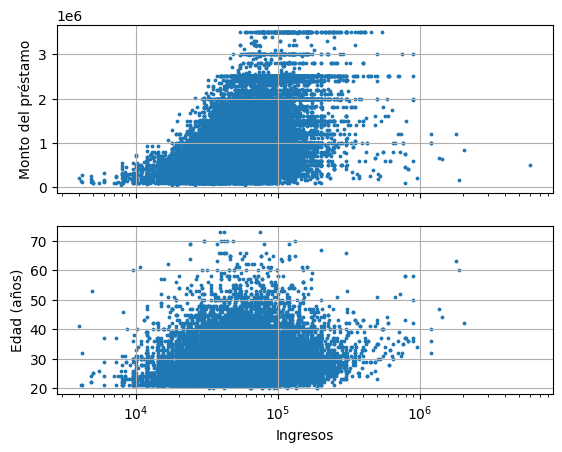

In [ ]:
plt.subplot(2,1,1)
plt.scatter(credit_data.Ingresos, credit_data['Monto del préstamo'] * 100, s=3)
plt.xscale('log')
plt.ylabel('Monto del préstamo')
plt.xticks([1e4,1e5,1e6], labels=" ")
plt.grid()
plt.subplot(2,1,2)
plt.scatter(credit_data.Ingresos, credit_data.Edad, s=3)
plt.xlabel('Ingresos')
plt.ylabel('Edad (años)')
plt.ylim(18,75)
plt.xscale('log')
plt.grid()
plt.show()


Será esta la mejor representación de los datos? Qué nos está diciendo? Cómo podemos mejorarlo? Ya volveremos sobre estos datos...

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        32581 non-null  int64  
 1   Ingresos                    32581 non-null  int64  
 2   Situacion de vivienda       32581 non-null  object 
 3   Tiempo de empleo            31686 non-null  float64
 4   Tipo de préstamo            32581 non-null  object 
 5   Grado del préstamo          32581 non-null  object 
 6   Monto del préstamo          32581 non-null  int64  
 7   Tasa de interés             29465 non-null  float64
 8   Estado del préstamo         32581 non-null  int64  
 9   Porcentaje del Ingreso      32581 non-null  float64
 10  Default histórico           32581 non-null  object 
 11  Long. historial crediticio  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Si queremos conocer el tipo de una variable en un dataframe de pandas, podemos usar: 

In [ ]:
credit_data.Edad.dtype

dtype('int64')

Si deseamos obtener los nombres de las columnas, usamos:

In [ ]:
credit_data.columns

Index(['Edad', 'Ingresos', 'Situacion de vivienda', 'Tiempo de empleo',
       'Tipo de préstamo', 'Grado del préstamo', 'Monto del préstamo',
       'Tasa de interés', 'Estado del préstamo', 'Porcentaje del Ingreso',
       'Default histórico', 'Long. historial crediticio'],
      dtype='object')

#### Histogramas
Con datos numéricos podemos estudiar las distribuciones de valores mediante histogramas:

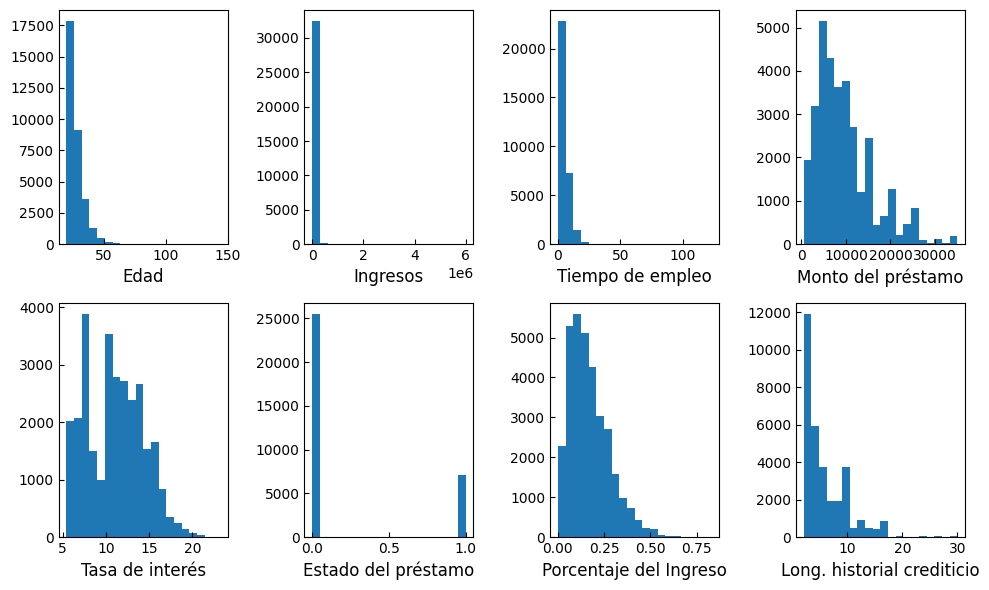

In [ ]:
i = 0
plt.figure(figsize=(10,6))
for var in credit_data:
  if credit_data[var].dtype in ['int64', 'float64']:
    i+=1
    plt.subplot(2,4,i)
    plt.hist(credit_data[var], bins=20)
    plt.xlabel(var, size=12)
    plt.tick_params(axis='both', direction='in')
plt.tight_layout()
plt.show()

#### Boxplot
Un boxplot es una alternativa interesante a un histograma para estudiar la distribución de datos numéricos. En ellos se suele mostrar la media, la mediana, y los rangos intercuartílicos (las barras suelen representar Q1 - 1.5 RIC y Q3+1.5 RIC)


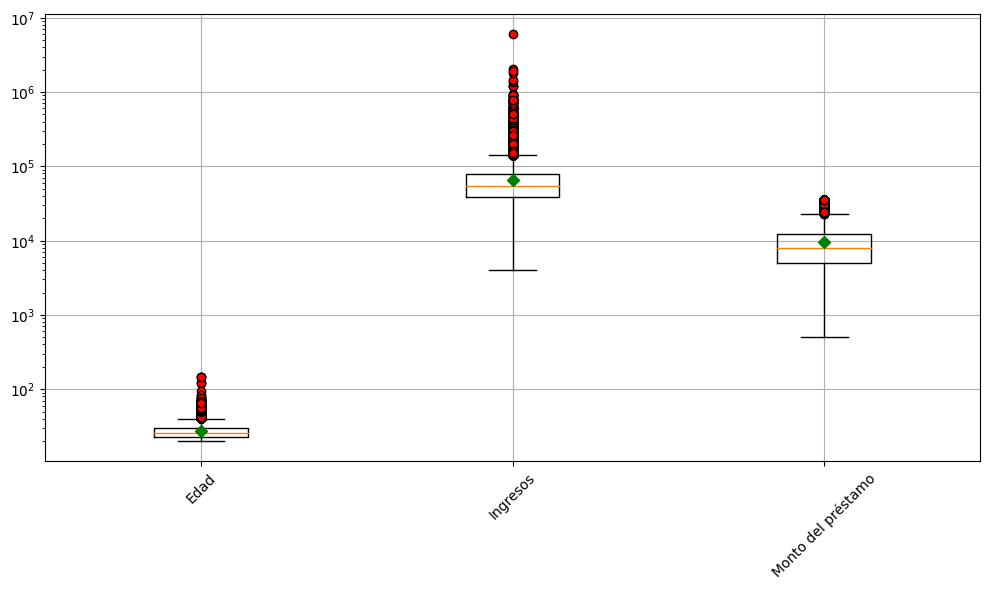

In [ ]:
i = 0
fig, ax = plt.subplots(figsize=(10,6))
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
variables_seleccionadas = ['Edad', 'Ingresos', 'Monto del préstamo']
ax.boxplot([credit_data[var] for var in variables_seleccionadas],
          flierprops=red_circle,
          showmeans=True,
          meanprops=mean_shape)

ax.set_xticklabels(variables_seleccionadas,
      rotation=45)
plt.yscale('log')
plt.grid()
plt.tight_layout()
# Creamos directorio en google colab
!mkdir graphs

# Guardamos el gráfico
plt.savefig('graphs/boxplots.png', dpi=300)
plt.show()

Tiene sentido presentar estas variables juntas en un box plot? Por qué no están loan_status, loan_percent_income? 

Vamos a ver que este tipo de gráfico es más fácil hacerlo con seaborn, plotly o bokeh.

#### Gráficos de violín
Una alternativa interesante a los boxplots son los violin plots o gráficos de violín. Son similares a los boxplots nomás que además muestran la densidad de probabilidad de los datos para diferentes valores. Se pueden incluir marcadores para la mediana, o los rangos intercuartílicos, como en los boxplots

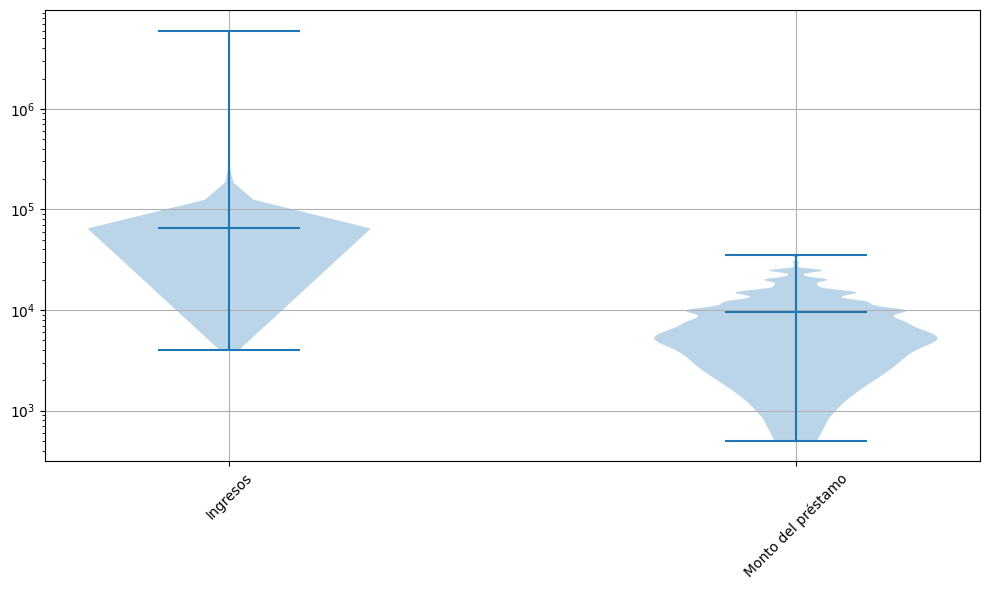

In [ ]:
i = 0
fig, ax = plt.subplots(figsize=(10,6))
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
ax.violinplot([credit_data[var] for var in ['Ingresos', 'Monto del préstamo']],
              showmeans = True,
              bw_method = 'scott'
              )

ax.set_xticks([1,2])
ax.set_xticklabels(['Ingresos', 'Monto del préstamo'],
      rotation=45)
plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.show()

Sobre el Método de Estimación por densidad de Kernel (KDE) : https://mathisonian.github.io/kde/

#### Gráficos de torta

Cuando trabajamos con datos categóricos, los gráficos de torta suelen ser bastante informativos, especialmente cuando la cantidad de clases distintas es baja. A continuación ejemplificamos un caso con matplotlib:

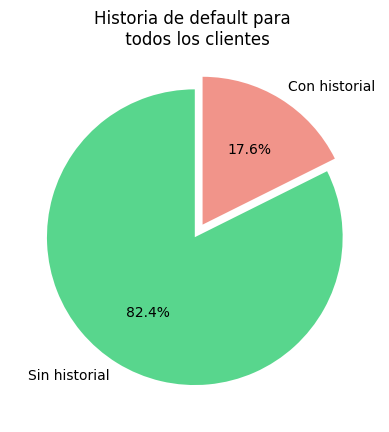

In [ ]:
# Todos los datos
plt.figure()
vals=credit_data['Default histórico'].value_counts()
plt.pie(vals, 
      labels=['Sin historial' if valor == 'N' else 'Con historial' for valor in vals.keys()],
        explode=(0, 0.1),
        autopct='%1.1f%%',
        colors=['#58D68D' if valor == 'N' else '#F1948A' for valor in vals.keys()],
        startangle=90)
plt.title('Historia de default para \n todos los clientes')
plt.show()

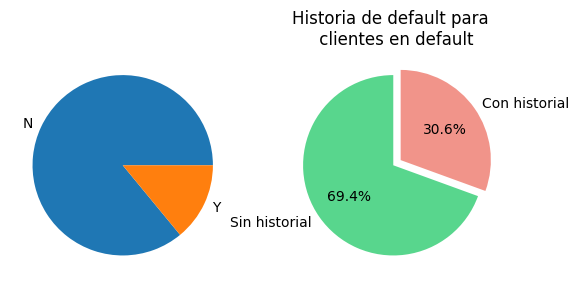

In [ ]:
plt.subplot(1,2,1)
vals = credit_data['Default histórico'][credit_data['Estado del préstamo']==0].value_counts()
plt.pie(vals, labels=vals.keys())
plt.subplot(1,2,2)
vals = credit_data['Default histórico'][credit_data['Estado del préstamo']==1].value_counts()
plt.pie(vals, 
      labels=['Sin historial' if valor == 'N' else 'Con historial' for valor in vals.keys()],
        explode=(0, 0.1),
        autopct='%1.1f%%',
        colors=['#58D68D' if valor == 'N' else '#F1948A' for valor in vals.keys()],
        startangle=90)
plt.title('Historia de default para \n clientes en default')
plt.show()

#### Métodos auxiliares de pandas

Pandas permite simplificar la cantidad de líneas de código para graficar, incorporando la librería matplotlib. Existen maneras directas de graficar mediante métodos existentes dentro de la clase `DataFrame`. A continuación volvemos al ejemplo sencillo y vemos cómo podemos jugar con estas opciones.

In [ ]:
df

,x,Variable ficticia,Variable**2
0,1,1.764052,3.111881
1,2,0.400157,0.160126
2,3,0.978738,0.957928
3,4,2.240893,5.021602
4,5,1.867558,3.487773


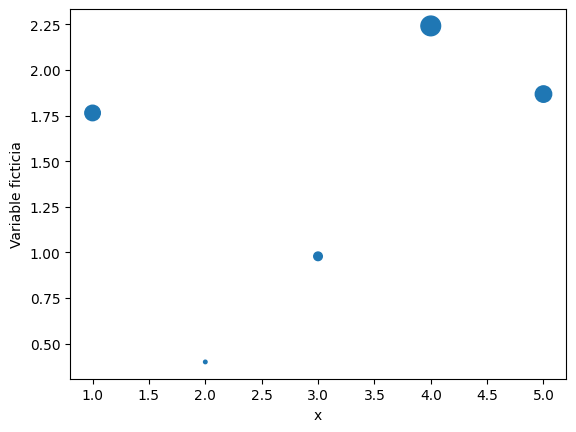

In [ ]:
df.plot(x='x', y='Variable ficticia', kind='scatter', s=df['Variable**2']*40) #scatter, bar, barh, box, pie, etc.

# Sin usar pandas:
# plt.scatter(df.x, df.y)

O bien, podemos directamente definir a la variable país como índice del dataframe, lo cuál puede ser muy útil:

Si queremos seleccionar un subconjunto de casos, podemos usar todas las ventajas de `pandas`. Podríamos hacer lo siguiente:

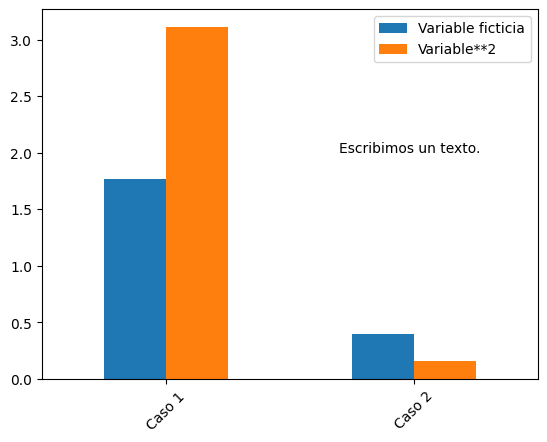

In [ ]:
fig = df.loc[[0,1],["Variable ficticia", "Variable**2"]].plot(kind='bar')
fig.set_xticklabels(['Caso 1', 'Caso 2'],
      rotation=45)
plt.text(0.7, 2, 'Escribimos un texto.')
plt.show()

### Seaborn

Existen distintos temas, o templates que se pueden utilizar dentro de seaborn. Ofrecen gran ayuda a la hora de la elección de paleta de colores y en la consistencia de los gráficos dentro de una misma notebook. Seaborn ofrece lo mismo que matplotlib y facilita el armado de figuras que suelen ser útiles durante la etapa estadística del Análisis de Datos Exploratorios (ADE).

In [ ]:
# Seleccionamos el tema. Puede ser el default o bien leer la documentación para ver las opciones
sns.set_theme()
#sns.set_theme?

#### Histogramas

In [ ]:
credit_data.columns

Index(['Edad', 'Ingresos', 'Situacion de vivienda', 'Tiempo de empleo',
       'Tipo de préstamo', 'Grado del préstamo', 'Monto del préstamo',
       'Tasa de interés', 'Estado del préstamo', 'Porcentaje del Ingreso',
       'Default histórico', 'Long. historial crediticio'],
      dtype='object')

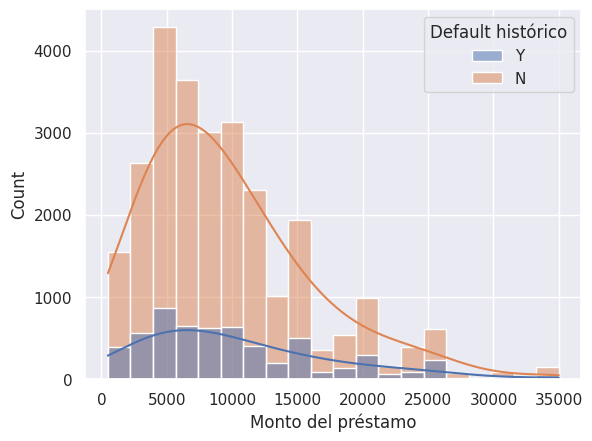

In [ ]:
sns.histplot(data=credit_data, 
             x ='Monto del préstamo', 
             hue='Default histórico',
             bins=20, 
             kde=True, 
             kde_kws={'bw_method':0.5})
plt.show()

#### Boxplots

In [ ]:
credit_data.columns

Index(['Edad', 'Ingresos', 'Situacion de vivienda', 'Tiempo de empleo',
       'Tipo de préstamo', 'Grado del préstamo', 'Monto del préstamo',
       'Tasa de interés', 'Estado del préstamo', 'Porcentaje del Ingreso',
       'Default histórico', 'Long. historial crediticio'],
      dtype='object')

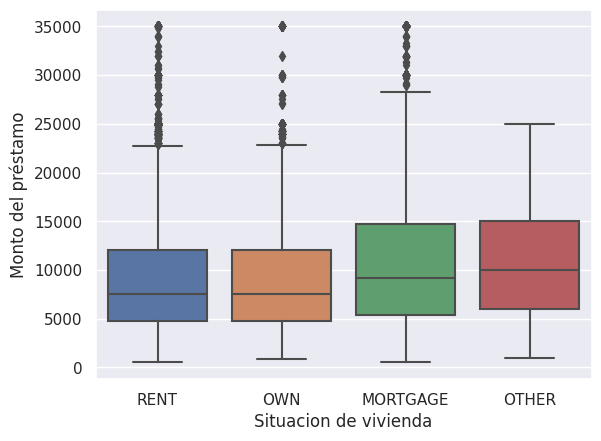

In [ ]:
# Boxplot de la variable edad:
sns.boxplot(data=credit_data, y ='Monto del préstamo', x='Situacion de vivienda')
# plt.ylim(18,50) para edad
# plt.ylim(0,30000) para monto
plt.show()

#### Violinplots

Otra representación posible de distribuciones. Pero en este caso, mostramos la distribucion condicional de una variable respecto a otra. La asimetría de los "violines" nos dan información acerca de la diferencia de las distribuciones condicionales.

In [ ]:
credit_data.columns

Index(['Edad', 'Ingresos', 'Situacion de vivienda', 'Tiempo de empleo',
       'Tipo de préstamo', 'Grado del préstamo', 'Monto del préstamo',
       'Tasa de interés', 'Estado del préstamo', 'Porcentaje del Ingreso',
       'Default histórico', 'Long. historial crediticio'],
      dtype='object')

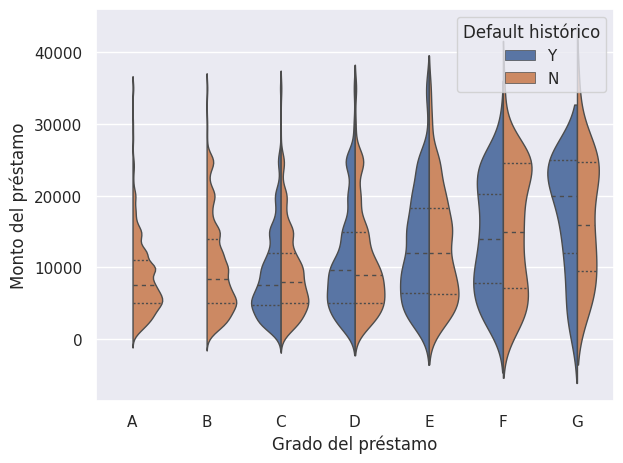

In [ ]:
sns.violinplot(x = 'Grado del préstamo',
               y='Monto del préstamo',
               hue='Default histórico',
               order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
               split=True,
               data=credit_data,
               inner="quart",
               linewidth=1,
               bw_method='scott')
plt.tight_layout()
plt.show()

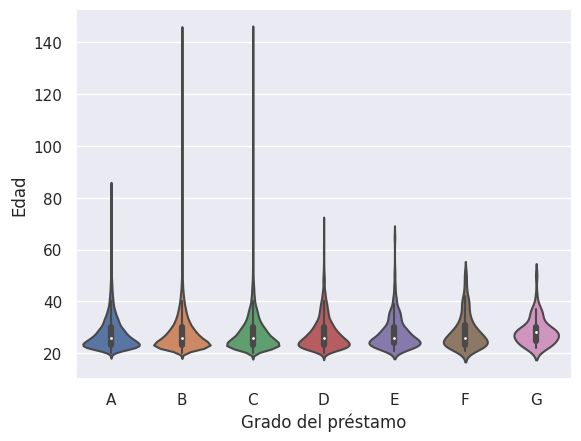

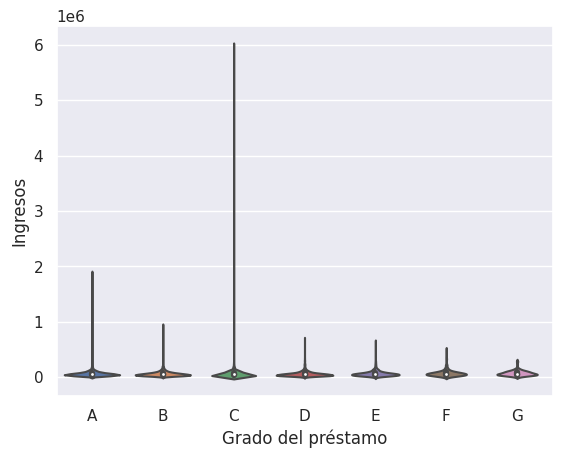

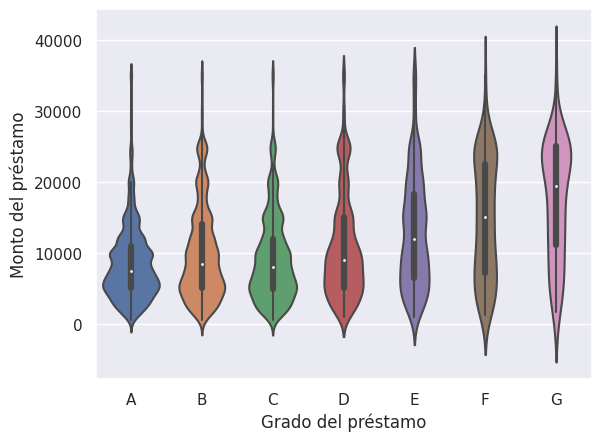

In [ ]:
for var in variables_seleccionadas:
  sns.violinplot(x = 'Grado del préstamo',
                 y=var,
                 order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                 data=credit_data,
                 bw_method='scott')
  # plt.yscale('log')
  plt.show()

#### Pairplots

Este gráfico sirve mucho como análisis exploratorio de una base de datos. No tanto para presentaciones, ya que no suele estar muy bien formateado. Además, suele ser bastante costoso computacionalmente. Sin embargo, permite ver la distribución de las variables 

In [ ]:
# sns.pairplot(credit_data) #lento

Muestro un ejemplo donde se puede apreciar mejor el beneficio de este tipo de gráficos:

In [ ]:
credit_data.columns

Index(['Edad', 'Ingresos', 'Situacion de vivienda', 'Tiempo de empleo',
       'Tipo de préstamo', 'Grado del préstamo', 'Monto del préstamo',
       'Tasa de interés', 'Estado del préstamo', 'Porcentaje del Ingreso',
       'Default histórico', 'Long. historial crediticio'],
      dtype='object')

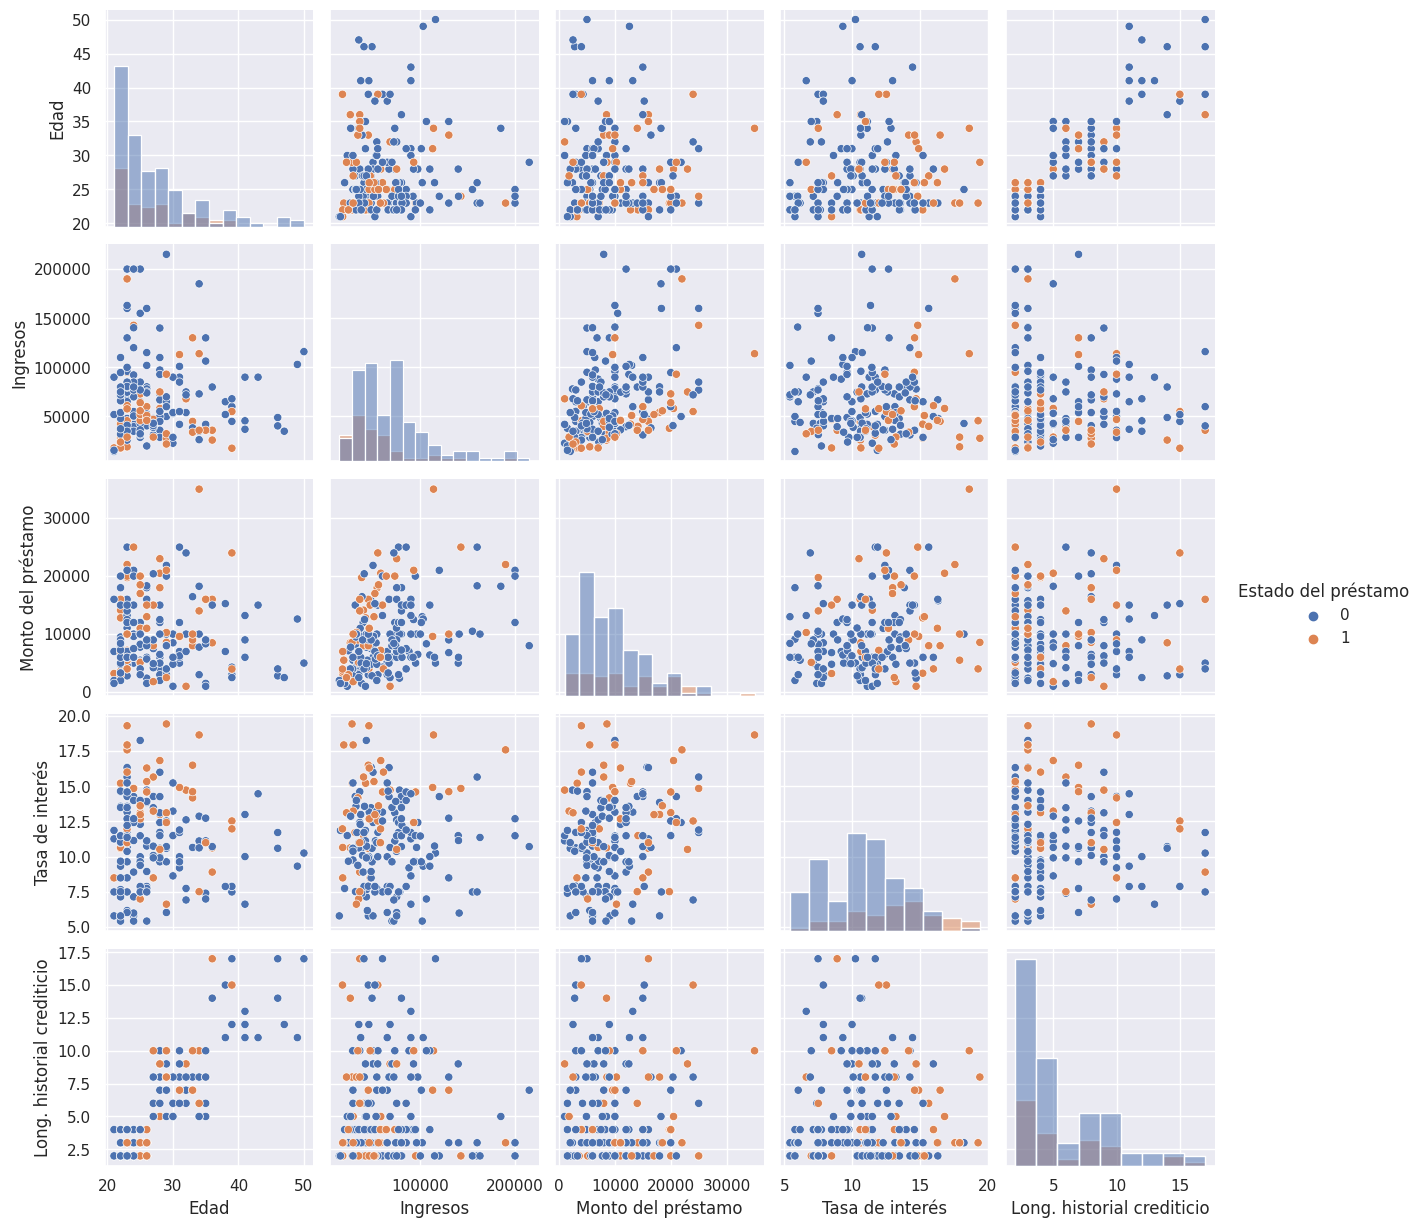

In [ ]:
df2 = credit_data[['Edad', 'Ingresos', 'Monto del préstamo', 'Tasa de interés', 'Long. historial crediticio', 'Situacion de vivienda', 'Estado del préstamo', 'Default histórico']].sample(200, random_state=1) #elegimos 200 casos al azar para que sea más rápido
sns.pairplot(df2, hue='Estado del préstamo', diag_kind="hist")

#### Matrices de correlación

Podemos calcular la correlación lineal entre variables numéricas. Para esto, `pandas` ofrece el método `corr()` que nos calcula directamente la matriz de correlación. Recuerden que la correlación es un número que va entre 1 y -1. Si la correlación es negativa significa que una variable disminuye cuando la otra aumenta o viceversa. Recuerden además que esto es sólo correlación LINEAL.

In [ ]:
corr = credit_data.corr()

In [ ]:
corr

,Edad,Ingresos,Tiempo de empleo,Monto del préstamo,Tasa de interés,Estado del préstamo,Porcentaje del Ingreso,Long. historial crediticio
Edad,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
Ingresos,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
Tiempo de empleo,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
Monto del préstamo,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
Tasa de interés,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
Estado del préstamo,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
Porcentaje del Ingreso,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
Long. historial crediticio,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


Algunas paletas de colores uniformes de seaborn son "rocket", "mako", "flare", and "crest". Pueden probar distintos colores o generar una paleta propia. Para más referencia ir a [este link de seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#).

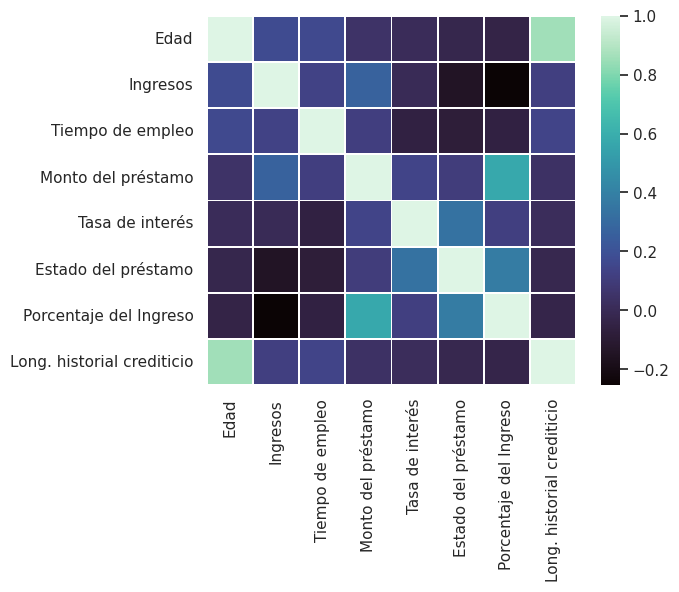

In [ ]:
sns.heatmap(corr, square=True, cmap=sns.color_palette('mako', as_cmap=True), linewidths=.5)
plt.show()

#### Categorical plots

Usa bootstrapping para computar un intervalo de confianza alrededor del valor estimado. Las barras de error muestran el intervalo de confianza obtenido

<Figure size 1000x500 with 0 Axes>

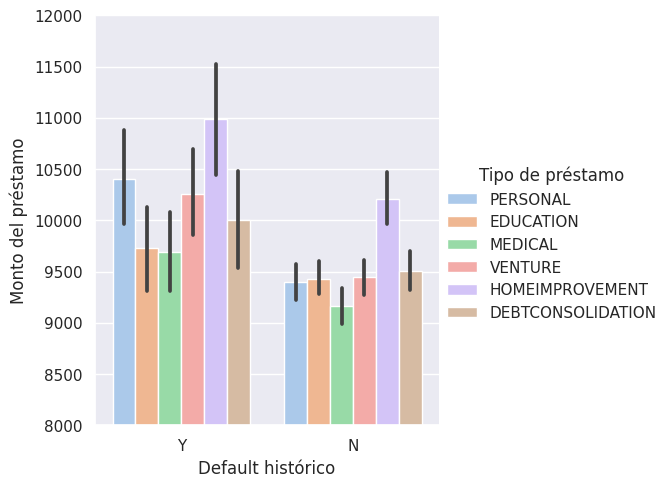

In [ ]:
with sns.plotting_context(font_scale=0.8):
  plt.figure(figsize=(10,5))
  sns.catplot(data=credit_data,
              x='Default histórico',
              y='Monto del préstamo',
              hue='Tipo de préstamo',
              kind='bar',
              palette="pastel")
  plt.ylim(8000,12000)
  plt.show()

### [Bokeh](http://bokeh.org/)

Esta librería nos servirá especialmente para armar Dashboards y gráficos interactivos. Es por esto que veremos su sintáxis a la hora de programar. 

#### Graficos de barra

In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, BoxAnnotation
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("dodged_bars.html")

# Creamos una base de datos ficticia
fruits = ['Manzanas', 'Peras', 'Naranjas', 'Ciruelas', 'Uvas', 'Frutillas']
years = ['2015', '2016', '2017']

data = {'Frutas' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

source = ColumnDataSource(data=data)

p = figure(x_range=fruits, y_range=(0, 10), height=250, title="Toneladas de frutas exportadas por año",
           toolbar_location=None, tools="")
          #  y_axis_type='log') si quiero escala log

p.vbar(x=dodge('Frutas', -0.25, range=p.x_range), top='2015', width=0.2, source=source,
       color="#c9d9d3", legend_label="2015")

p.vbar(x=dodge('Frutas',  0.0,  range=p.x_range), top='2016', width=0.2, source=source,
       color="#718dbf", legend_label="2016")

p.vbar(x=dodge('Frutas',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
       color="#e84d60", legend_label="2017")

# Si quiero hacer énfasis en algún rango de Y por ejemplo
#low_box = BoxAnnotation(bottom=1, top=2, fill_alpha=0.2, fill_color="#F0E442")
#p.add_layout(low_box)

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

#### Barras apiladas 

In [ ]:
output_notebook()

colors = ["#c9d9d3", "#718dbf", "#e84d60"]

data = {'Frutas' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 4, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}


p1 = figure(x_range=fruits, height=250, title="Toneladas de frutas exportadas por año",
           toolbar_location=None, tools="")

p1.vbar_stack(years, x='Frutas', width=0.9, color=colors, source=data,
             legend_label=years)

p1.y_range.start = 0
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.axis.minor_tick_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_left"
p1.legend.orientation = "horizontal"

show(p1)

#### Barras apiladas pero divididas

In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p2 = figure(y_range=fruits, height=250, x_range=(-16, 16), title="Toneladas de frutas importada/exportada por año",
           toolbar_location=None)

p2.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend_label=["Exportaciones %s" % x for x in years])

p2.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend_label=["Importaciones %s" % x for x in years])

p2.y_range.range_padding = 0.1
p2.ygrid.grid_line_color = None
p2.legend.location = "top_left"
p2.axis.minor_tick_line_color = None
p2.outline_line_color = None
p2.xaxis.axis_label = 'Toneladas'

show(p2)

Si quisieramos ambos gráficos en uno sólo, podemos usar lo siguiente:

In [ ]:
from bokeh.layouts import row, column

show(column(p1,p2))

## Series de tiempo

Veamos esto con un conjunto de datos más interesante. Usamos la base de datos de Producto Bruto Interno ("Per capita gross domestic product" (GDP) ) de [The Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/original-maddison):  

In [ ]:
#Traemos los datos
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

try:
    # Busca en la carpeta pathout si está el archivo
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
except:
    # Si no está, lo trae de la web y lo guarda dentro de la carpeta pathout.
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)

Con el método `info()` podemos saber los nombres de las variables y los tipos de datos correspondientes.

In [ ]:
maddison_new_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1038
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       1039 non-null   object 
 1   region_name  1039 non-null   object 
 2   year         1039 non-null   float32
 3   cgdppc       761 non-null    float32
 4   rgdpnapc     761 non-null    float32
 5   pop          761 non-null    float64
dtypes: float32(3), float64(1), object(2)
memory usage: 44.6+ KB


utilizaremos contextos de seaborn:

In [ ]:
sns.plotting_context("talk")

{'axes.linewidth': 1.875,
 'grid.linewidth': 1.5,
 'lines.linewidth': 2.25,
 'lines.markersize': 9.0,
 'patch.linewidth': 1.5,
 'xtick.major.width': 1.875,
 'ytick.major.width': 1.875,
 'xtick.minor.width': 1.5,
 'ytick.minor.width': 1.5,
 'xtick.major.size': 9.0,
 'ytick.major.size': 9.0,
 'xtick.minor.size': 6.0,
 'ytick.minor.size': 6.0,
 'font.size': 18.0,
 'axes.labelsize': 18.0,
 'axes.titlesize': 18.0,
 'xtick.labelsize': 16.5,
 'ytick.labelsize': 16.5,
 'legend.fontsize': 16.5,
 'legend.title_fontsize': 18.0}

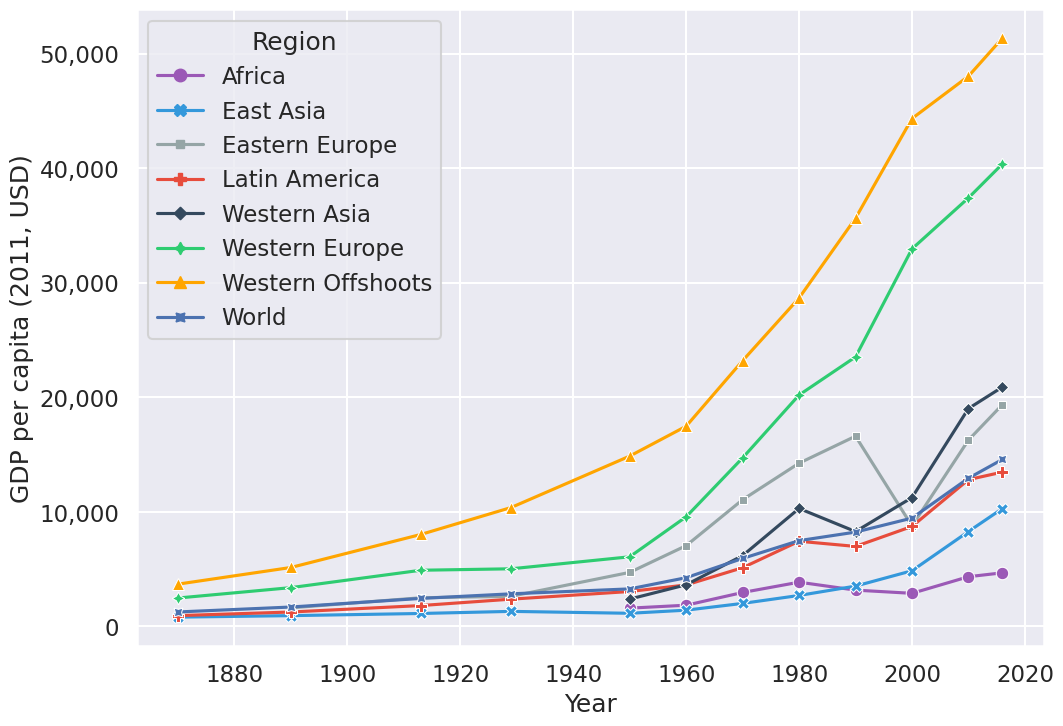

In [ ]:
maddison_new_region['Region'] = maddison_new_region.region_name

mycolors2 = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "orange", "b"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year',
             y='cgdppc',
             hue='Region',
             data=maddison_new_region.loc[
                 (maddison_new_region.year.apply(lambda x: x in [1870, 1890, 1913, 1929,1950, 2016])) | 
                 ((maddison_new_region.year>1950) & (maddison_new_region.year.apply(lambda x: np.mod(x,10)==0)))
                 ],
              alpha=1,
              palette=sns.color_palette(mycolors2), 
             style='Region', 
             dashes=False, 
             markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (2011, USD)')
plt.savefig(pathgraphs + 'y1870-2016.pdf', dpi=300, bbox_inches='tight')

In [ ]:
maddison_new_region

,region,region_name,year,cgdppc,rgdpnapc,pop,Region
0,af,Africa,1870.0,NaN,NaN,NaN,Africa
1,af,Africa,1871.0,NaN,NaN,NaN,Africa
2,af,Africa,1872.0,NaN,NaN,NaN,Africa
3,af,Africa,1873.0,NaN,NaN,NaN,Africa
4,af,Africa,1874.0,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...
1034,wd,World,2012.0,13821.0,13818.0,6992923.0,World
1035,wd,World,2013.0,14038.0,14090.0,7072213.0,World
1036,wd,World,2014.0,14261.0,14376.0,7152269.0,World
1037,wd,World,2015.0,14500.0,14616.0,7231375.0,World


Podemos también realizar una transformación logarítmica a los datos para analizar el comportamiento exponencial

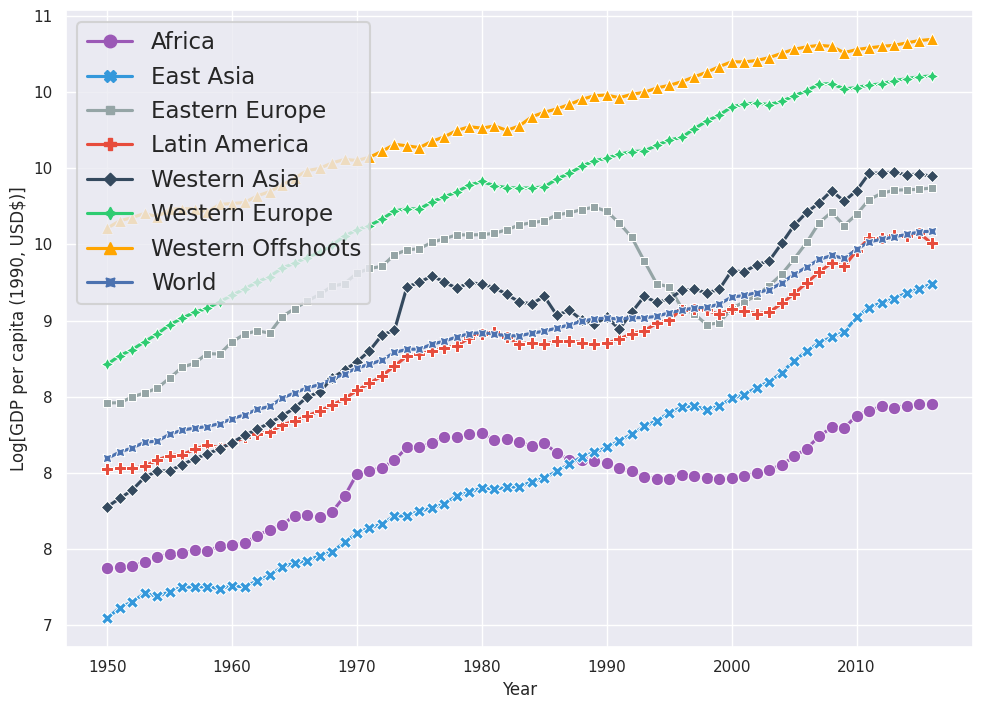

In [ ]:
maddison_new_region['lgdppc'] = np.log(maddison_new_region.cgdppc)

# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "orange", "b"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot
fig, ax = plt.subplots()
#sns.reset_orig()
with sns.plotting_context("talk"):
  sns.lineplot(x='year', y='lgdppc', hue='Region', 
              data=maddison_new_region.loc[(maddison_new_region.year>=1950)].reset_index(drop=True),
              alpha=1,
              palette=sns.color_palette(mycolors),
              style='Region',
              dashes=False,
              markers=True,)
  ax.tick_params(axis = 'both', which = 'major')
  ax.tick_params(axis = 'both', which = 'minor')
  ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  ax.legend(loc='upper left')
  ax.set_xlabel('Year')
  ax.set_ylabel('Log[GDP per capita (1990, USD$)]')
  plt.savefig(pathgraphs + 'sg1950-2000.pdf', dpi=300, bbox_inches='tight')

#### Mapas de calor

Los mapas de calor pueden servir para analizar dos variables categóricas al mismo tiempo. Lo vemos en el conjunto de datos de la tasa de desempleo de Estados unidos desde 1948 hasta el 2016

In [ ]:
import pandas as pd

from bokeh.io import output_file, show, output_notebook
output_notebook()

from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter)
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data
from bokeh.transform import transform

data.Year = data.Year.astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

# Le damos la forma de un array 1-dimensional 
print(data)
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()
print(df)

source = ColumnDataSource(df)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())

p = figure(width=800, height=300, title="US unemployment 1948—2016",
           x_range=list(data.index), y_range=list(reversed(data.columns)),
           toolbar_location=None, tools="", x_axis_location="above")

p.rect(x="Year", y="Month", width=1, height=1, source=source,
       line_color=None, fill_color=transform('rate', mapper))

color_bar = ColorBar(color_mapper=mapper,
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)

Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                             
1948   4.0  4.7  4.5  4.0  3.4  3.9  3.9  3.6  3.4  2.9  3.3  3.6
1949   5.0  5.8  5.6  5.4  5.7  6.4  7.0  6.3  5.9  6.1  5.7  6.0
1950   7.6  7.9  7.1  6.0  5.3  5.6  5.3  4.1  4.0  3.3  3.8  3.9
1951   4.4  4.2  3.8  3.2  2.9  3.4  3.3  2.9  3.0  2.8  3.2  2.9
1952   3.7  3.8  3.3  3.0  2.9  3.2  3.3  3.1  2.7  2.4  2.5  2.5
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2012   8.8  8.7  8.4  7.7  7.9  8.4  8.6  8.2  7.6  7.5  7.4  7.6
2013   8.5  8.1  7.6  7.1  7.3  7.8  7.7  7.3  7.0  7.0  6.6  6.5
2014   7.0  7.0  6.8  5.9  6.1  6.3  6.5  6.3  5.7  5.5  5.5  5.4
2015   6.1  5.8  5.6  5.1  5.3  5.5  5.6  5.2  4.9  4.8  4.8  4.8
2016   5.3  5.2  5.1  4.7  4.5  5.1  5.1  5.0  4.8  4.7  4.4  4.5

[69 rows x 12 columns]
     Year Month  rate
0    1948   Jan   4.0
1    1948   Feb   4.7
2    1948   Mar   4.5
3    1948   Apr   4.0
4    194

####Ejemplo casos de covid en Brasil

Datos de casos confirmados y muertos registrados por día en el 2020 en Sao Paulo, Brasil. 

In [ ]:
#traemos datos
covid = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', parse_dates=True, index_col=0)
covid

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-12-26,1253,13
2020-12-27,2836,55
2020-12-28,1576,39


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2020-02-26 to 2020-12-30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   confirmed  302 non-null    int64
 1   deaths     302 non-null    int64
dtypes: int64(2)
memory usage: 7.1 KB


Podemos utilizar directamente el método plot de pandas que, cuando los índices son fechas, directamente grafica las series temporales.

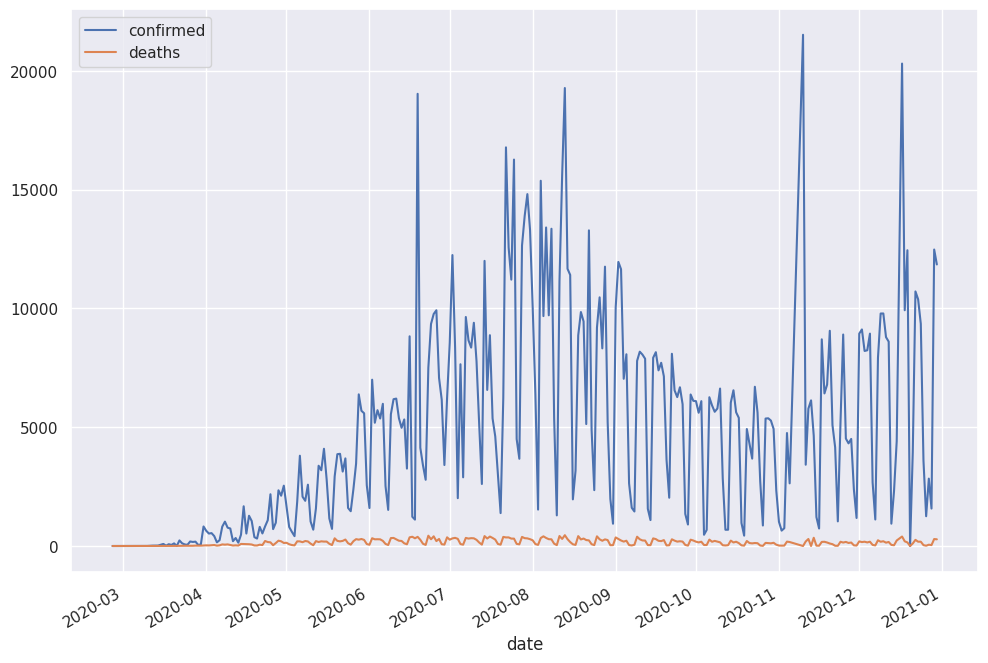

In [ ]:
covid.plot();

En este caso, las escalas de los casos confirmados y los muertos difiere demasiado en órdenes de magnitud, por lo cual resulta razonable graficarlos o bien en escala logarítmica en "y" o bien en dos gráficos separados. Como Son datos con muchos 0's, optamos por la segunda opción para evitar problemas con los datos nulos y la función logarítmica.

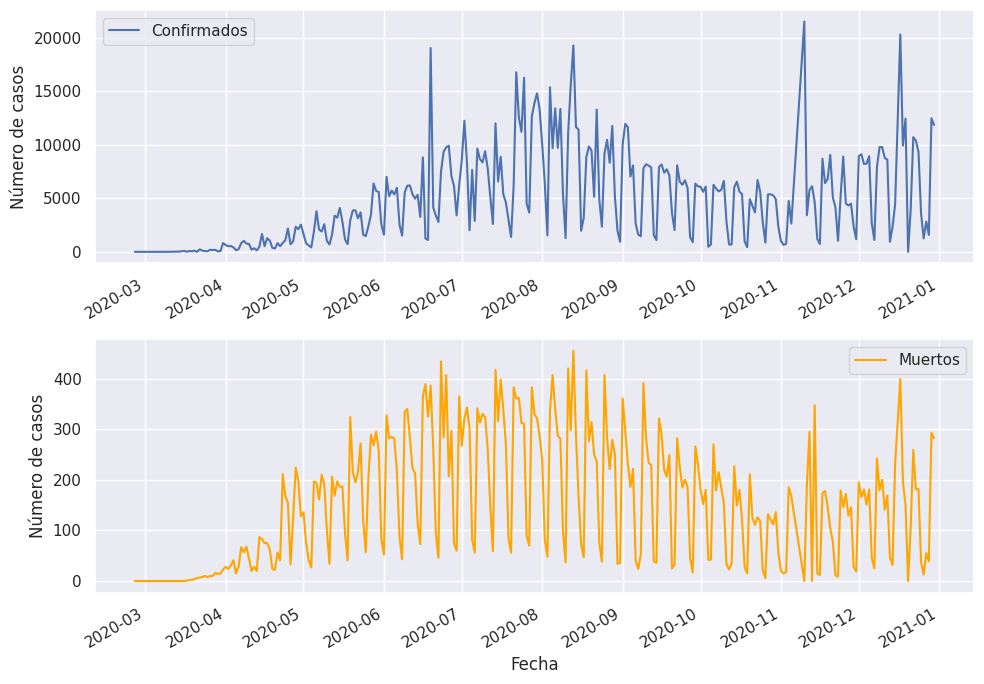

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(211)
covid.confirmed.plot(label='Confirmados')
plt.legend()
plt.xlabel(None)
plt.ylabel('Número de casos')
plt.subplot(212)
covid.deaths.plot(color='orange', label='Muertos')
plt.legend()
plt.tight_layout()
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()

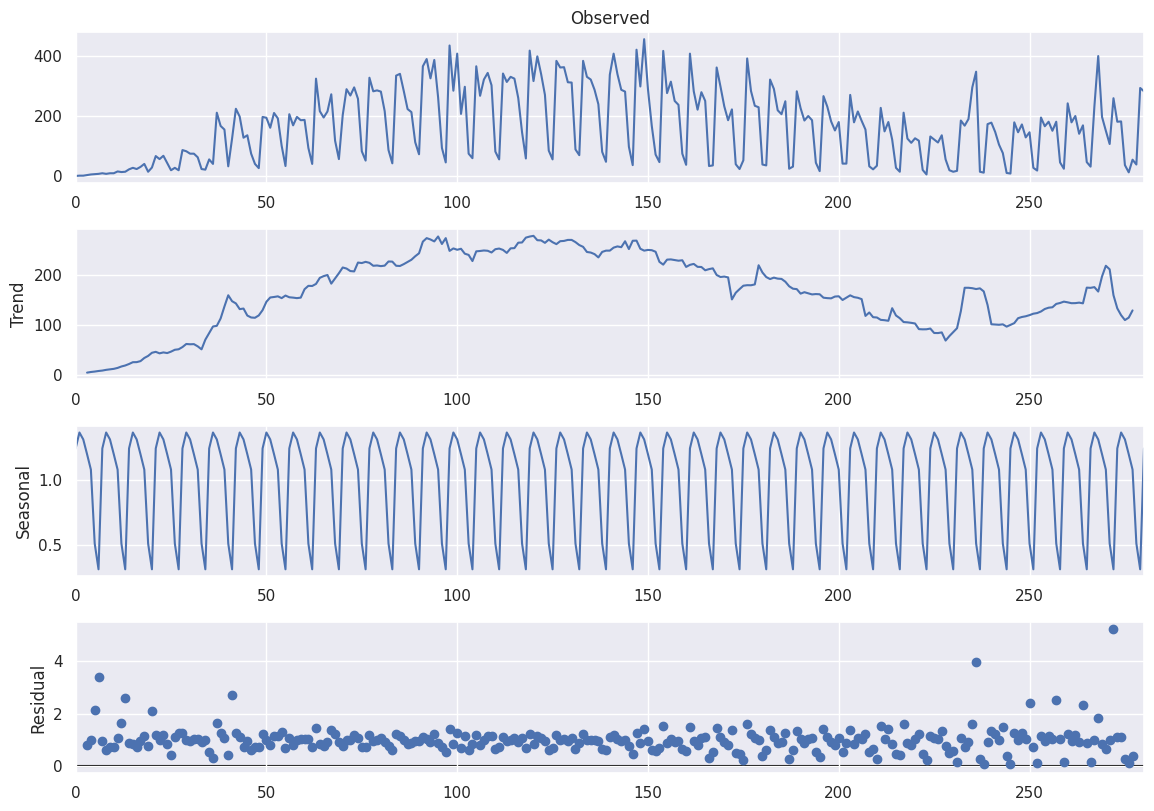

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

y = covid['deaths']

muertes = np.array(y)

muertes_pos = muertes[muertes>0]
result = seasonal_decompose(muertes_pos, model='multiplicative', period=7)
fig = result.plot()

plt.show()

Podemos mejorar este gráfico todo lo que querramos utilizando las herramientas de matplotlib que hemos estado viendo

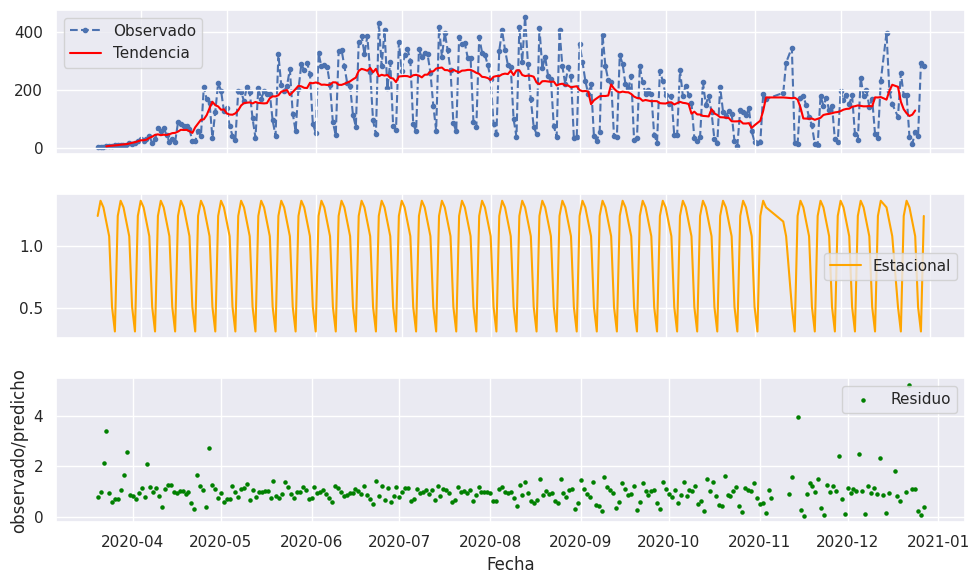

In [ ]:
df_result = pd.DataFrame({'Tendencia':result.trend,
                        'Estacional':result.seasonal,
                        'Residuo':result.resid},
                      index=covid[covid.deaths>0].index)

colores = ['red', 'orange', 'green']
plt.figure(figsize=(10,6))
i = 0
for i, (var, color) in enumerate(zip(df_result, colores)):
  i += 1
  fig = plt.subplot(3,1,i)
  if i == 1:
    plt.plot(df_result.index, muertes_pos, 'o--',zorder=0, ms=3, label='Observado')
    plt.xlabel('Nro. de casos')
  if i!=3:
    df_result[var].plot(label=var, color=color)
    fig.axes.get_xaxis().set_ticklabels([])
    plt.xlabel(None)
  else:
    plt.scatter(df_result.index, df_result[var], s=5, label=var, color=color)
    plt.ylabel('observado/predicho')
  plt.legend()
plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

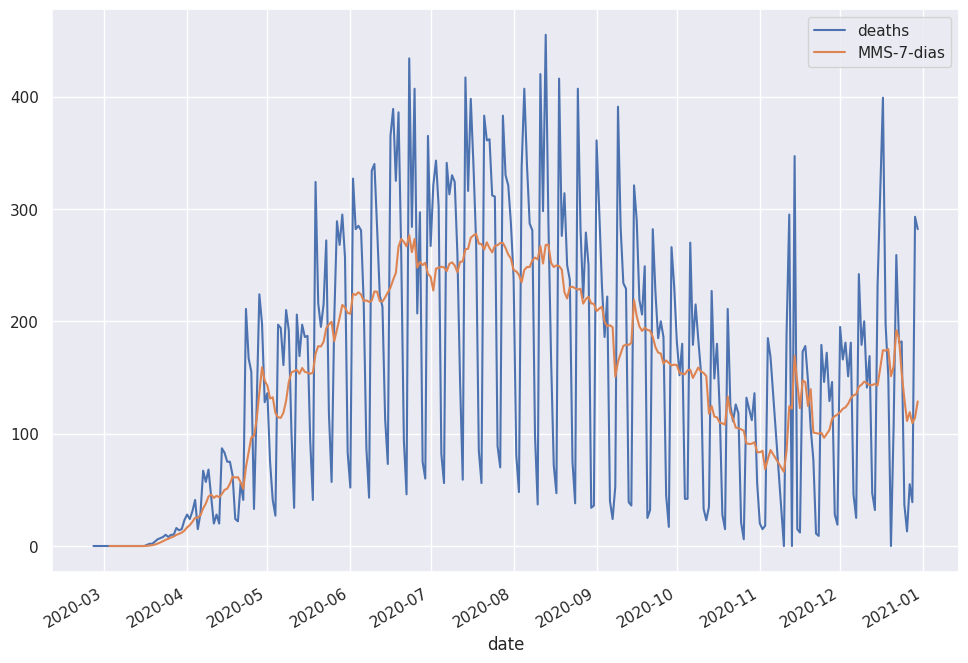

In [ ]:
covid['MMS-7-dias'] = covid['deaths'].rolling(window=7).mean()
covid[['deaths','MMS-7-dias']].plot()

Supongamos que queremos hacer este mismo gráfico con Bokeh, existen ejes de tipo datetime:

In [ ]:
from bokeh.models import DatetimeTickFormatter, NumeralTickFormatter, HoverTool

p = figure(title='Casos de covid',
           x_axis_type='datetime',
           sizing_mode="stretch_width",
           tools=[HoverTool()],
           tooltips="@y",
           max_width=700,
           height=250)

p.circle(covid.index, covid.deaths, color="#1f77b4", line_width=1, legend_label='Muertos')
p.line(covid.index, covid.deaths, color="#1f77b4", line_width=1, legend_label='Muertos')
p.line(covid.index, covid['MMS-7-dias'], color='#ff7f0e', line_width=2, legend_label='Media movil 7 días')

p.yaxis[0].formatter = NumeralTickFormatter(format="0")
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")
p.legend.location = 'top_left'
p.legend.click_policy = 'hide' 
show(p)

Podemos hacer un gráfico de boxplot quedándonos que la información de cada mes. Para esto, aprovechamos la estructura `DateTimeIndex` de `pandas`, que nos permite acceder al día, semana, mes o año de una fecha.

In [ ]:
# Exctraemos la información del mes de cada caso nuevo confirmado
covid['Mes'] = covid.index.month

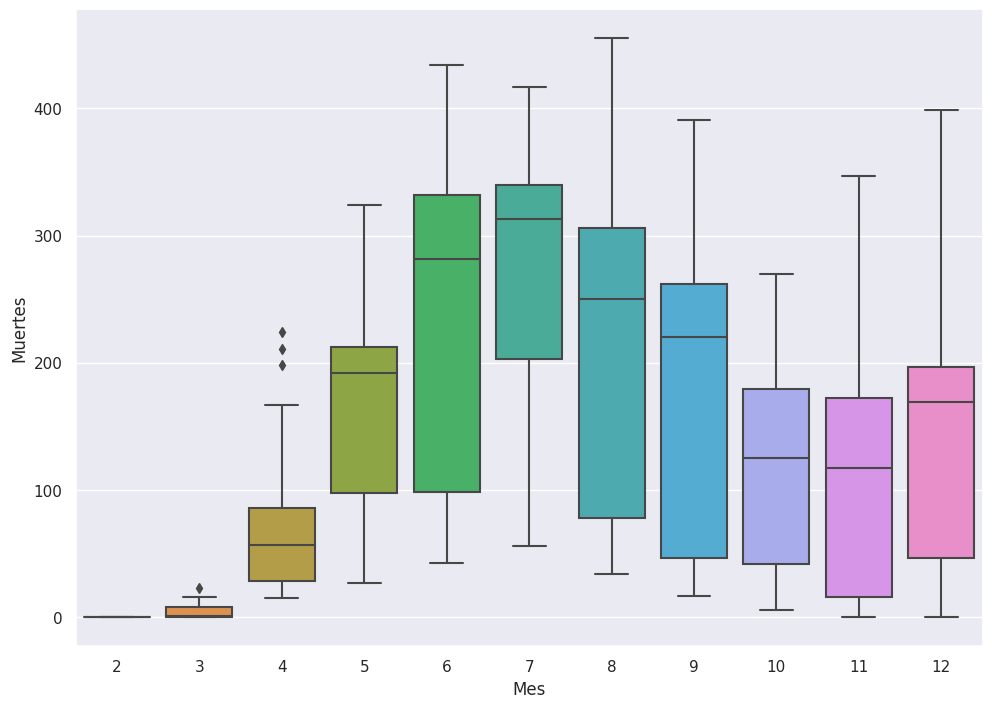

In [ ]:
# Graficamos boxplot por mes
sns.boxplot(x='Mes',y='deaths', data=covid)
plt.ylabel('Muertes')
plt.show()

Podemos hacer lo mismo, pero ahora extraer la información de la semana:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


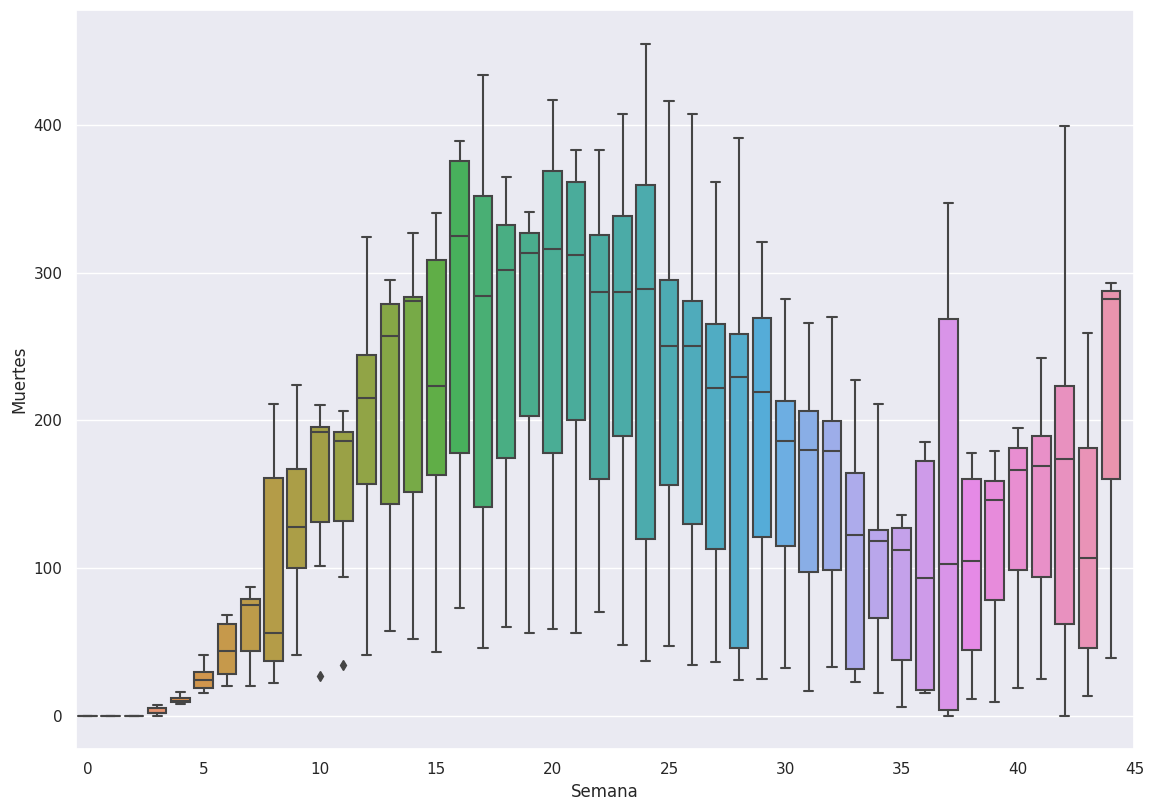

In [ ]:
covid['Semana'] = covid.index.week
sns.boxplot(x='Semana',y='deaths', data=covid)
plt.xticks(ticks= np.arange(0,50,5), labels = np.arange(0,50,5))
plt.ylabel('Muertes')
plt.tight_layout()
plt.show()

## Mapas y datos geoespaciales

#### Datos Salario en Gran Bretaña

Primero instalamos los paquetes necesarios. Geopandas servirá para trabajar con datos geoestadísticos, matplotib_scalebar y mapclassify serán necesarios para agregar escala a los mapas.

In [ ]:
!pip install geopandas -q
!pip install matplotlib_scalebar -q
!pip install mapclassify -q

     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 6.3 MB 47.6 MB/s 
     |████████████████████████████████| 16.7 MB 39.8 MB/s 


Luego traemos los datos tomados de [2]

In [ ]:
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.shx -q
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.shp -q
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.xml -q
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.prj -q
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.dbf -q
!wget https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/uk_lad/Local_Authority_Districts__May_2020__UK_BUC.cpg -q


Podemos abrir los datos usando `gpd.read_file`

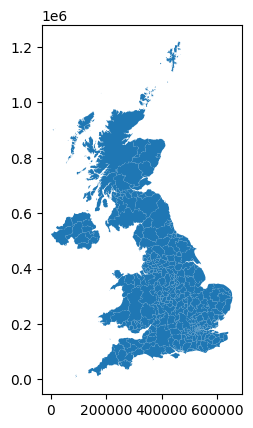

In [ ]:
import geopandas as gpd
from pathlib import Path
import os
mpl.rc_file_defaults()
df3 = gpd.read_file(Path("Local_Authority_Districts__May_2020__UK_BUC.shp"))
df3.plot();

In [ ]:
df3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    379 non-null    int64   
 1   LAD20CD     379 non-null    object  
 2   LAD20NM     379 non-null    object  
 3   LAD20NMW    22 non-null     object  
 4   BNG_E       379 non-null    int64   
 5   BNG_N       379 non-null    int64   
 6   LONG        379 non-null    float64 
 7   LAT         379 non-null    float64 
 8   Shape__Are  379 non-null    float64 
 9   Shape__Len  379 non-null    float64 
 10  geometry    379 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 32.7+ KB


Existen maneras de adornar los gráficos, utilizando todas las propiedades que conoces de matplotlib

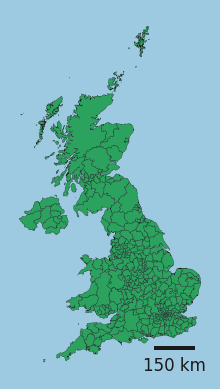

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar

fig, ax = plt.subplots()
df3.plot(color="#2ca25f", edgecolor="k", linewidth=0.2, facecolor="blue", ax=ax)
ax.axis("off")
fig.patch.set_facecolor("#9ecae1")
# Create scale bar
scalebar = ScaleBar(
    1,
    box_alpha=0,
    location="lower right",
    length_fraction=0.25,
    font_properties={"size": 12},
)
ax.add_artist(scalebar)
plt.show()

Ahora vamos a traer los datos del salario en gran bretaña en el 2020. Para poder mergear ambos conjuntos de datos, la variable de concatenación debe tener el mismo nombre en ambos dataframes

In [ ]:
pay = pd.read_csv(
    "https://github.com/aeturrell/coding-for-economists/raw/main/data/geo/ashe_lad_median_pay_2020.csv"
)
pay = pay.rename(columns={"lad": "LAD20CD"})

In [ ]:
df3.head()

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,9.660727e+07,50737.909874,"POLYGON ((448973.593 536745.277, 448986.025 53..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,5.523093e+07,35500.289988,"POLYGON ((451894.299 521145.303, 453997.697 51..."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,2.483255e+08,85085.268776,"POLYGON ((478232.599 518788.828, 477689.303 51..."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.5569,2.052160e+08,88846.876387,"POLYGON ((452243.536 526335.188, 451711.300 52..."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,1.988128e+08,91926.839545,"POLYGON ((436388.002 522354.197, 437351.702 52..."


Veamos las distribuciones de salarios medios semanales en Gran Bretaña

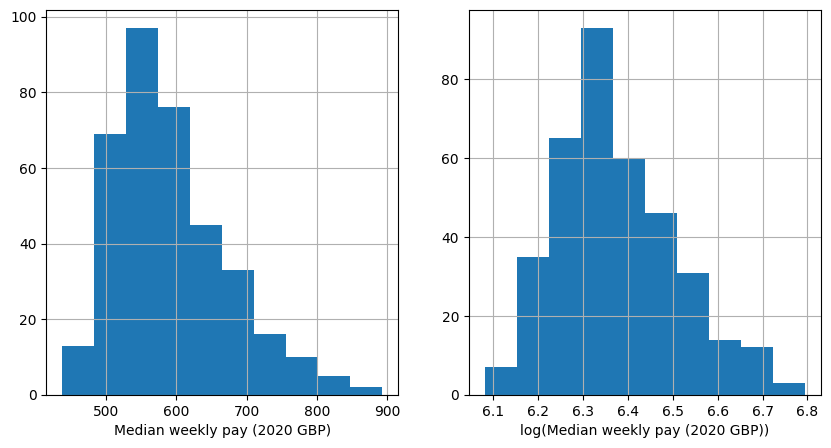

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
pay['Median weekly pay (2020 GBP)'].hist()
plt.xlabel('Median weekly pay (2020 GBP)')
plt.subplot(1,2,2)
np.log(pay['Median weekly pay (2020 GBP)']).hist()
plt.xlabel('log(Median weekly pay (2020 GBP))')
plt.show()

Ahora podemos mergear los datos de ambos dataframes. Además graficaremos el logaritmo del salario medio


In [ ]:
df3 = df3.merge(pay, on=["LAD20CD"], how="inner")
col = "Log median weekly pay (2020 GBP)"
df3[col] = np.log(df3["Median weekly pay (2020 GBP)"])

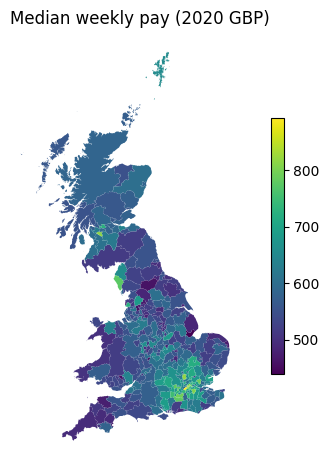

In [ ]:
col = "Median weekly pay (2020 GBP)"
fig, ax = plt.subplots()
ax.set_title(col, loc="left")
df3.plot(
    ax=ax,
    column=col,
    legend=True,
    legend_kwds={"label": "", "shrink": 0.6},
    vmin=round(df3[col].min()),
    vmax=round(df3[col].max()),
    # scheme='Quantiles',
    # k=4,
)
ax.axis("off")
plt.tight_layout()
plt.show();

#### Datos transporte aereo Argentina

[Datos provincia](https://datos.gob.ar/dataset/jgm-servicio-normalizacion-datos-geograficos/archivo/jgm_8.26)

[Datos transporte aereo](https://servicios.transporte.gob.ar/gobierno_abierto/descargar.php?t=aeropuertos&d=detalle)

A continuación dejo un código para importar los datos de los aeropuertos de argentina con sus correspondientes coordenadas geoespaciales:

In [ ]:
import requests
import urllib

API_BASE_URL = "https://apis.datos.gob.ar/georef/api/"

def get_territorial_units(ubicaciones):
    """Pide las unidades territoriales que contienen a c/punto de una lista de coordenadas."""

    # realiza consulta a la API
    endpoint = "ubicacion"
    data = {
        "ubicaciones": [
            {"lat": ubicacion["lat"], "lon": ubicacion["lon"], "aplanar": True}
            for ubicacion in ubicaciones
    ]}
    url = API_BASE_URL + endpoint

    results = requests.post(
        url, json=data, headers={"Content-Type": "application/json"}
    ).json()

    # convierte a una lista de "resultado más probable" o "vacío" cuando no hay
    parsed_results = [
        single_result[endpoint] if single_result[endpoint] else {}
        for single_result in results["resultados"]
    ]

    return parsed_results

def add_territorial_units(df, column_lat, column_lon):
    """Agrega unidades territoriales que contienen coordenadas a un DataFrame.

    Args:
        df (pandas.DataFrame): Un DataFrame que tiene coordenadas.
        column_lat (str): Nombre de la columna que tiene latitud.
        column_lon (str): Nombre de la columna que tiene longitud.

    Returns:
        pandas.DataFrame: DataFrame original aumentado con unidades       territoriales que contienen a las coordenadas.
    """

    # toma una lista de coordenadas únicas (no repetidas)
    coordinates = df[[column_lon, column_lat]].rename(
        columns={column_lon: "lon", column_lat: "lat"}
    ).drop_duplicates().to_dict("records")

    # crea DataFrame de unidades territoriales que contienen a las coordenadas
    ubicaciones = pd.DataFrame(get_territorial_units(coordinates))

    # agrega las unidades territoriales al DataFrame original
    df_with_territorial_units = df.merge(
        ubicaciones, "left",
        left_on=[column_lon, column_lat],
        right_on=["lon", "lat"]
    )

    # elimina columnas de coordenadas repetidas, dejando las originales
    return df_with_territorial_units.drop(["lon", "lat"], axis=1)

df4 = pd.read_csv("https://servicios.transporte.gob.ar/gobierno_abierto/descargar.php?t=aeropuertos&d=detalle", sep=";")
df4 = add_territorial_units(df4, "longitud", "latitud")

Vemos nombres de variables:

In [ ]:
df4.columns

Index(['local', 'oaci', 'iata', 'tipo', 'denominacion', 'coordenadas',
       'latitud', 'longitud', 'elev', 'uom_elev', 'ref', 'distancia_ref',
       'direccion_ref', 'condicion', 'control', 'region', 'fir', 'uso',
       'trafico', 'sna', 'concesionado', 'provincia', 'inhab',
       'departamento_id', 'departamento_nombre', 'municipio_id',
       'municipio_nombre', 'provincia_id', 'provincia_nombre'],
      dtype='object')

Vemos que datos tenemos:

In [ ]:
df4.head()

,local,oaci,iata,tipo,denominacion,coordenadas,latitud,longitud,elev,uom_elev,...,sna,concesionado,provincia,inhab,departamento_id,departamento_nombre,municipio_id,municipio_nombre,provincia_id,provincia_nombre
0,ACB,NaN,NaN,Aeródromo,CORONEL BOGADO/AGROSERVICIOS,"33°16'20""S 60°34'14""W",-60.57066,-33.27226,44.0,Metros,...,NO,NO,SANTA FÉ,NO,82084,Rosario,823393,Coronel Bogado,82,Santa Fe
1,ACH,NaN,NaN,Aeródromo,GENERAL ACHA,"37°24' 6""S 64°36'49""W",-64.61351,-37.40164,277.0,Metros,...,NO,NO,LA PAMPA,NO,42154,Utracán,420133,General Acha,42,La Pampa
2,ACM,NaN,NaN,Aeródromo,ARRECIFES/LA CURA MALAL,"34° 4'33""S 60° 8'30""W",-60.14170,-34.07574,37.0,Metros,...,NO,NO,BUENOS AIRES,NO,06077,Arrecifes,060077,Arrecifes,06,Buenos Aires
3,ADO,SAWD,PUD,Aeródromo,PUERTO DESEADO,"47°44' 6""S 65°54'15""W",-65.90410,-47.73511,82.0,Metros,...,NO,NO,SANTA CRUZ,NO,78014,Deseado,None,None,78,Santa Cruz
4,ADT,NaN,NaN,Aeródromo,BANDERA/AGROSERVICIOS DOÑA TERESA,"28°51'19""S 62°15'53""W",-62.26462,-28.85541,75.0,Metros,...,NO,NO,SANTIAGO DEL ESTERO,NO,86077,General Taboada,None,None,86,Santiago del Estero


Luego, traemos los datos geográficos de argentina:

In [ ]:
!wget https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.34/download/provincias.zip
!unzip provincias.zip

--2022-09-20 18:18:28--  https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.34/download/provincias.zip
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10497796 (10M) [application/zip]
Saving to: ‘provincias.zip’

provincias.zip      100%[===================>]  10.01M  8.01MB/s    in 1.3s    

2022-09-20 18:18:30 (8.01 MB/s) - ‘provincias.zip’ saved [10497796/10497796]

Archive:  provincias.zip
   creating: provincias/
  inflating: provincias/provincias.dbf  
  inflating: provincias/provincias.shx  
  inflating: provincias/provincias.cpg  
  inflating: provincias/provincias.shp  
  inflating: provincias/provincias.prj  


Graficamos el mapa utilizando geopandas y matplotlib

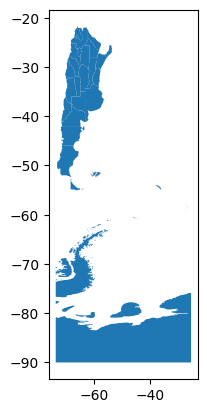

In [ ]:
df5 = gpd.read_file(Path("provincias/provincias.shp"))
df5.plot();

In [ ]:
df5.head()

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
1,428,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,Geografía,58,9.771811,21.515985,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
2,429,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,IGN,Geografía,42,14.553019,19.665614,"MULTIPOLYGON Z (((-64.76547 -40.78351 0.00000,..."
3,430,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,IGN,Geografía,50,14.658388,23.259986,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
4,431,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,Geografía,74,7.333771,14.490196,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."


Cambiamos nombre de la variable provincia para poder mergear:

In [ ]:
df5 = df5.rename(columns={"NAM": "provincia_nombre"})

Verificamos que los nombres sean adecuados

In [ ]:
df5['provincia_nombre'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Neuquén', 'La Pampa',
       'Mendoza', 'San Luis', 'Córdoba', 'Santa Fe', 'Entre Ríos',
       'San Juan', 'La Rioja', 'Catamarca', 'Tucumán', 'Jujuy', 'Chaco',
       'Formosa', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Chubut', 'Río Negro', 'Buenos Aires', 'Corrientes',
       'Misiones', 'Salta'], dtype=object)

In [ ]:
df4['provincia_nombre'].unique()

array(['Santa Fe', 'La Pampa', 'Buenos Aires', 'Santa Cruz',
       'Santiago del Estero', 'Ciudad Autónoma de Buenos Aires',
       'Neuquén', 'Córdoba', 'San Juan', 'Río Negro', 'Entre Ríos',
       'Catamarca', 'Misiones', 'Chubut', 'Corrientes', 'Salta',
       'Tucumán', 'San Luis', 'Chaco', 'Jujuy', 'Mendoza',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'Formosa',
       'La Rioja', None], dtype=object)

Mergeamos

In [ ]:
df5 = df5.merge(df4, on=["provincia_nombre"], how="inner")

Ploteamos con matplotlib:

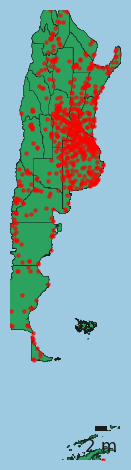

In [ ]:
fig, ax = plt.subplots()
df5.plot(
    ax=ax,
    color="#2ca25f",
    edgecolor="k",
    linewidth=0.2,
)

fig.patch.set_facecolor("#9ecae1")
scalebar = ScaleBar(
    1,
    box_alpha=0,
    location="lower right",
    length_fraction=0.25,
    font_properties={"size": 12},
)
ax.add_artist(scalebar)

ax.scatter(df5.latitud, df5.longitud, zorder=1, c='red', s=5, alpha=0.6)

ax.axis("off")
plt.xlim(df4.latitud.min(), df4.latitud.max())
plt.ylim(df4.longitud.min(), df4.longitud.max())
plt.tight_layout()
plt.show();

Podemos generar mapa interactivo utilizando folium. Vamos a graficar sólo los aeródromos de Córdoba:

In [ ]:
df5.provincia_nombre.unique()

array(['Ciudad Autónoma de Buenos Aires', 'Neuquén', 'La Pampa',
       'Mendoza', 'San Luis', 'Córdoba', 'Santa Fe', 'Entre Ríos',
       'San Juan', 'La Rioja', 'Catamarca', 'Tucumán', 'Jujuy', 'Chaco',
       'Formosa', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Chubut', 'Río Negro', 'Buenos Aires', 'Corrientes',
       'Misiones', 'Salta'], dtype=object)

In [ ]:
import folium

m = folium.Map(location=[df5.longitud.mean(), df5.latitud.mean()], zoom_start=5)

nombre = 'Córdoba'
#agregamos los datos
tooltip = "Hacer click."
for index, row in df5[df5.provincia_nombre==nombre].iterrows():
    folium.Marker((row['longitud'],row['latitud']), popup=row["denominacion"], tooltip=tooltip).add_to(m)
m

# Bibliografía 

- [1] [Fundamentals of Data visualization, Claus O. Wilke](https://clauswilke.com/dataviz/)

- [2] [Coding for Economist, Arthur Turrell](https://aeturrell.github.io/coding-for-economists/intro.html)

- [3] [Intro a Python del Insituto Balseiro, Juan Fiol](https://fiolj.github.io/intro-python-IB)

- [4] [Python for Data Science, Arthur Turrell](https://aeturrell.github.io/python4DS/introduction.html)